# Using logistic regression to predict risk heart disease

In [2]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('heart_disease.csv')
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [5]:
# Identify missing values
missing_values = df.isnull().sum()
cols_with_missing = df.columns[df.isnull().any()].tolist()
cols_with_missing

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

Using imputation the process of filling in misssing data with estimated values. 

In [6]:
from sklearn.impute import SimpleImputer

# choose imputation strategies for numeric columns
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# separate numeric columns
numeric_columns = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

# impute missing values in numeric columns
imputer.fit(df[numeric_columns])
imputed_numeric_data = imputer.transform(df[numeric_columns])


In [21]:
# concatenate imputed data and create a new DataFrame
imputed_df = pd.DataFrame(imputed_numeric_data, columns=numeric_columns)

# concatenate the imputed data with the original DataFrame
imputed_df = pd.concat([df.drop(columns=numeric_columns), imputed_df], axis=1)

Checking for variance in imputed data is important because imputation can potentially affect the distribution of the data and its variability, which in turn can affect the performance of downstream machine learning models.

Imputation methods such as mean, median or mode imputation can change the distribution of the data by replacing missing values with a single value or a few values, which can affect the statistical properties of the data. For example, mean imputation can lead to a shift in the mean of the data, while mode imputation can cause a change in the mode of the data.

Additionally, imputation can reduce the variability of the data by introducing less variability compared to the original data. This can result in the loss of information and can impact the model's ability to capture patterns and relationships in the data.

Therefore, it is important to check the variance of imputed data to assess the extent to which imputation has affected the distribution and variability of the data. If the variance of imputed data is significantly different from the original data, it may indicate that the imputation method used has introduced bias or reduced the information content of the data. In such cases, it may be necessary to consider using a different imputation method or explore other options to handle missing values.


In [22]:
# check if there is any missing values
imputed_df.isna().sum()
imputed_df.head()

,Gender,age,education,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,Heart_ stroke,cigsPerDay,BPMeds,totChol,BMI,heartRate,glucose
0,Male,39,postgraduate,0,no,0,0,106.0,70.0,No,0.0,0.0,195.0,26.97,80.0,77.0
1,Female,46,primaryschool,0,no,0,0,121.0,81.0,No,0.0,0.0,250.0,28.73,95.0,76.0
2,Male,48,uneducated,1,no,0,0,127.5,80.0,No,20.0,0.0,245.0,25.34,75.0,70.0
3,Female,61,graduate,1,no,1,0,150.0,95.0,yes,30.0,0.0,225.0,28.58,65.0,103.0
4,Female,46,graduate,1,no,0,0,130.0,84.0,No,23.0,0.0,285.0,23.10,85.0,85.0


C:\Users\georg\AppData\Local\Temp\ipykernel_19688\48489373.py:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = imputed_df.var()


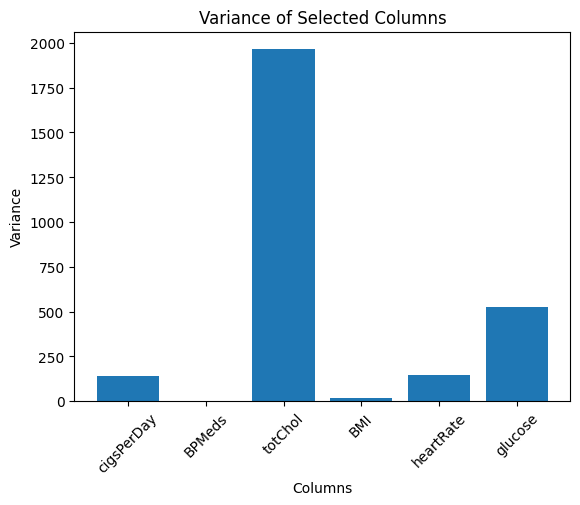

In [23]:
import matplotlib.pyplot as plt
# perform a variance check on the imputed data
# Check the variance of each column in the imputed dataset
variance = imputed_df.var()

# plot the variances
columns_to_plot = numeric_columns
variances = [imputed_df[column].var() for column in columns_to_plot]

plt.bar(columns_to_plot, variances)
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Variance')
plt.title('Variance of Selected Columns')
plt.show()

In [24]:
imputed_df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'sysBP', 'diaBP', 'Heart_ stroke',
       'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X = imputed_df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Gender']]
y = imputed_df['Heart_ stroke']

# Convert categorical variables to dummy variables (if any)
X = pd.get_dummies(X,drop_first=True)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model to the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      1.00      0.92      1084
         yes       0.62      0.04      0.08       188

    accuracy                           0.85      1272
   macro avg       0.74      0.52      0.50      1272
weighted avg       0.82      0.85      0.80      1272



c:\Users\georg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The first row shows the precision, recall, and F1-score for the "No" class, which represents patients who do not have heart stroke. The precision is the proportion of patients predicted to not have heart stroke who actually do not have it, and it is 86%. The recall is the proportion of patients who actually do not have heart stroke and are correctly identified by the model, and it is 100%. The F1-score is a combination of precision and recall, and it is 92%. The support indicates the number of patients in this class.

The second row shows the precision, recall, and F1-score for the "yes" class, which represents patients who have heart stroke. The precision is 62%, meaning that 62% of the patients predicted to have heart stroke actually have it. The recall is 4%, meaning that only 4% of the patients who actually have heart stroke are correctly identified by the model. The F1-score is 8%, which is a relatively low value. The support indicates the number of patients in this class.

The accuracy of the model is 85%, meaning that the model correctly classified 85% of the patients in the testing set.

In general, the model performs well in identifying patients who do not have heart stroke (precision of 86% and recall of 100%). However, it is less accurate in identifying patients who do have heart stroke (precision of 62% and recall of 4%). The F1-score for the "yes" class is particularly low at 8%, which means that the model struggles to correctly classify patients with heart stroke. Therefore, further improvements to the model may be needed before it can be used to make reliable predictions.

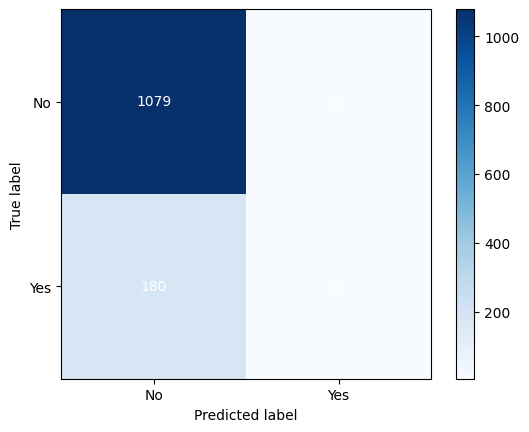

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define the labels for the x and y axes
classes = ['No', 'Yes']

# Create the plot
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.xticks([0, 1], classes)
plt.yticks([0, 1], classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.colorbar()

# Add the counts to the plot
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')

# Show the plot
plt.show()


A confusion matrix above that shows the number of true positive, true negative, false positive, and false negative predictions made by our machine learning model. In this case, our model is predicting the likelihood of a patient experiencing heart stroke based on a number of factors, such as age, blood pressure, and gender. The rows of the matrix represent the true outcomes (actual heart stroke occurrence), while the columns represent the predicted outcomes (model's prediction).

For example, the top left cell of the matrix represents the number of patients who did not experience heart stroke in reality (true negative) and were also correctly identified by our model (predicted negative). The bottom right cell represents the number of patients who did experience heart stroke (true positive) and were correctly identified by our model (predicted positive). The other two cells represent the cases where our model made incorrect predictions (false positives and false negatives).

The precision, recall, and f1-score values shown in the classification report provide additional metrics for evaluating the performance of our model in making these predictions. By analyzing the confusion matrix and the associated metrics, we can better understand how our model is performing and identify areas where it may need improvement.

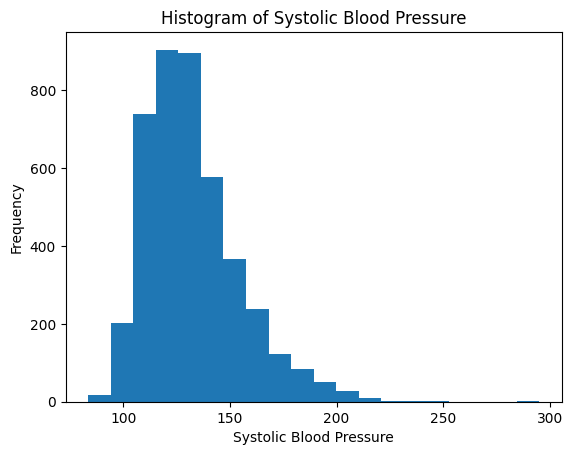

In [27]:
import matplotlib.pyplot as plt

plt.hist(df['sysBP'], bins=20)
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')
plt.title('Histogram of Systolic Blood Pressure')
plt.show()


This histogram shows the distribution of systolic blood pressure among the patients in our dataset. The x-axis represents the range of blood pressure values, and the y-axis shows the number of patients that fall within each range. We can see that the majority of patients have a systolic blood pressure between 100 and 150, with a smaller number having higher or lower blood pressure. Understanding the distribution of blood pressure values in our dataset can help us identify potential health risks and design targeted interventions to improve patient health.